# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kaushini | Chandrachoodamani | K.C | 3 | 50%  |
| Member 2: | Armin | Ali Yari | A.A | 3 | 50% |



---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [2]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [5]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [6]:
# TODO: Load the info method of cv_set
# (1 mark)
print(cv_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [7]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [8]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [9]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [10]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [12]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [13]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [14]:
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None], 'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf']
             }
# Initialize the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler is StandardScaler
    ('classifier', SVC())  # Default classifier is SVC
])


In [15]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [16]:
# TODO: Print the results from the grid search
# (2 marks)

#print("Best params:\n{}\n".format(grid_search.best_params_))
#print("Best cross-validation train score: {:.2f}".format(grid_search.best_score_))
#print("Best cross-validation validation score: {:.2f}".format(grid_search.best_score_))
#print("Test-set score: {:.2f}".format(test_score)))

Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

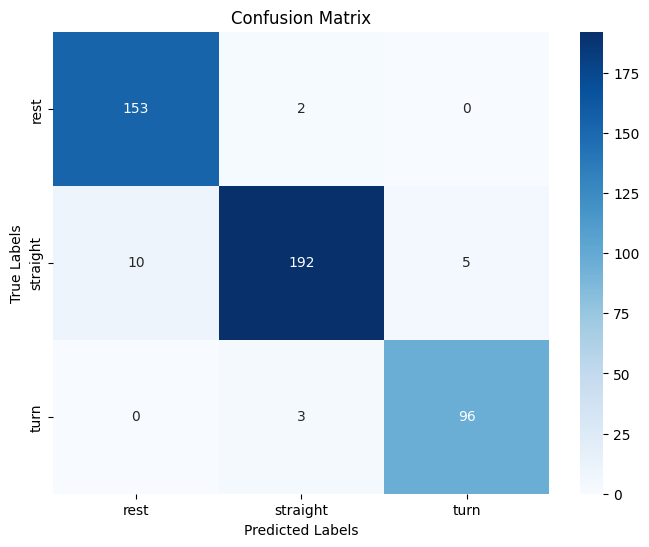

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [17]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set using the best model from grid search
y_pred = grid.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The fit of the model can be assessed based on the following:
Cross-validation Score: If this score is high and close to 1, it suggests that the model is fitting the training data well. However, if the training score is high but the test score is significantly lower, this could indicate overfitting.
Test-set Performance: A large difference between the training and test scores suggests overfitting.
Confusion Matrix & Classification Report:he classification report gives precision, recall, and F1-score for each class, which helps to understand the balance of the model’s performance across different classes.
2.  C Parameter: The values [0.01, 0.1, 1, 10, 100] cover a broad range from low regularization (0.01) to strong regularization (100). These values are generally suitable because they span a reasonable range of C. If C is too small, the model may underfit, and if C is too large, the model might overfit.
Gamma Parameter: The values [0.001, 0.01, 0.1, 1] cover a wide range of possible values for the gamma parameter, which controls the influence of a single training point. Since the values are discreet, they might some finer tune values, especially if the optimal gamma lies between the two values in the grid.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [18]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [19]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [20]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
# Assuming 'model' is your trained classifier
# and 'X1', 'y1', 'X2', 'y2' are your test set features and target variables:

from sklearn.metrics import accuracy_score # Make sure to import the module

# Assuming you have a trained model (e.g., using LogisticRegression)
# If not, replace this with your actual model training code
from sklearn.linear_model import LogisticRegression # Import the desired model
model = LogisticRegression()  # Create a model instance
model.fit(X1, y1)  # Train the model on your training data

# Calculate the scores for test_set1 and test_set2
test_set1_score = accuracy_score(y1, model.predict(X1))
test_set2_score = accuracy_score(y2, model.predict(X2))

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.84
test_set2 score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

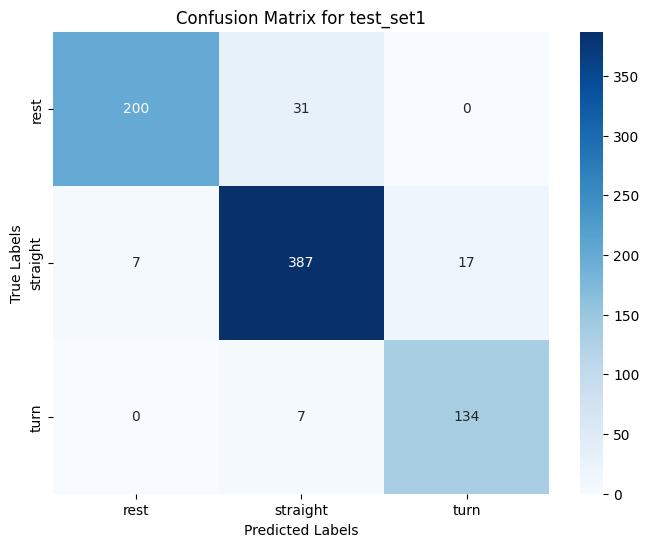

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [21]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test_set1 using the best model from grid search
y1_pred = grid.predict(X1)

# Generate confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set1')
plt.show()

# Print the classification report
print("Classification Report for test_set1:\n")
print(classification_report(y1, y1_pred))



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

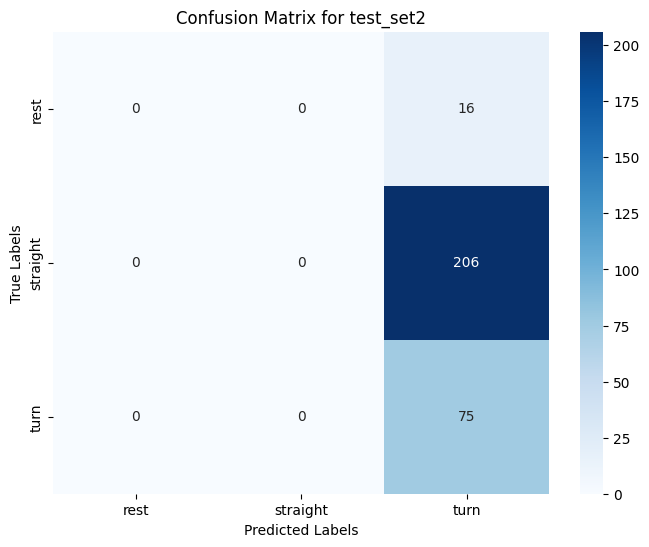

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test_set2 using the best model from grid search
y2_pred = grid.predict(X2)

# Generate confusion matrix
cm2 = confusion_matrix(y2, y2_pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print the classification report
print("Classification Report for test_set2:\n")
print(classification_report(y2, y2_pred))


___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The performance of the model on the Testing dataset is expected to be close to or similar to the cross-validation performance. If the model performs significantly worse on the independent test datasets compared to the training or validation set, it is an indication that the model is not generalizing well to new, unseen data. Thus, significant differences in performance are a clear indicator that the model is either overfitting to the training data or not generalizing well due to dataset shift.
2. The following could be the causes for the observed behaviour:

* Dataset Shift (Covariate Shift, Label Shift, Concept Shift):
Covariate Shift: If the feature distributions in X1 and X2 differ from the training set, this could affect the model's performance.
Label Shift: The class distributions in y1 and y2 may not match those in the training data. If some classes are overrepresented or underrepresented in the test sets compared to the training set, the model might perform poorly due to imbalanced class distributions.
Concept Shift: Over time, the relationship between the features and the target variable may have changed.
* Overfitting to the Training Data:  
Overfitting: If the model performs well on the training set but poorly on the test sets (X_test, X1, X2), it is likely overfitting.
Effect of Hyperparameters: The choice of hyperparameters (e.g., C and gamma for SVM) may also contribute to overfitting.

* Differences in Feature Engineering or Data Quality:
Feature Engineering: If the feature extraction process (such as scaling, encoding, or handling missing values) differs between the training and test datasets, it could lead to inconsistencies in model performance.
Data Quality Issues: If the data quality in X1 or X2 is lower than in the training set (e.g., more noise, missing values, or erroneous measurements), it could lead to a decrease in performance.
* Hyperparameter Tuning and Regularization:
Hyperparameter Tuning: The lack of proper hyperparameter tuning for the test datasets can cause the model to underperform on those datasets.
Regularization: If the model is over-regularized (e.g., by selecting a too high value of C), it may fail to capture the complexity of the data. On the other hand, if regularization is too weak, the model may overfit the training data, leading to poor generalization.


___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [23]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [24]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [25]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Initialize the pipeline with a scaler and the SVC classifier
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

# Step 3: Define the hyperparameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Step 4: Perform grid search to tune the hyperparameters
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters and the best cross-validation score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Step 6: Evaluate the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_score))

# Step 7: Display confusion matrix and classification report
y_pred = grid_search.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters found:  {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation score: 0.82
Test set accuracy: 0.83
Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]
Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [26]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid_search.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid_search.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid_search.best_score_))
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [27]:
# TODO - Display confusion matrix and print classification reports
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for the test set using the best model from grid search
y_pred = grid_search.predict(X_test)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]
Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. Based on the classification reports, the first model with an accuracy of 96% performs significantly better than the second model with an accuracy of 83%. But based on the evaluation metrics:
Precision: The first model achieves consistently higher precision across all classes. This means it makes fewer false positive predictions compared to the second model.
Recall:
For "Rest" and "Straight," the first model performs as well or better than the second.
For "Turn," the recall of the second model is much lower (0.55 vs. 0.97), indicating it struggles to correctly identify instances of "Turn."
F1-Score: The first model has significantly better F1-scores across all classes, meaning it achieves a better balance between precision and recall.
The first model is a much better fit based on the evaluation metrics. It is more accurate, balanced, and performs well across all classes. The second model's performance, especially for the "Turn" class, suggests it would lead to poor predictions in scenarios requiring high accuracy for this class.

If consistent and balanced performance across all classes is important, the first model is the clear choice.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [28]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [29]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [30]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.84
test_set2 score: 0.83


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [31]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for test_set1 (X1, y1)
y1_pred = grid_search.predict(X1)

# Display the confusion matrix for test_set1
print("Confusion Matrix for test_set1:")
print(confusion_matrix(y1, y1_pred))

# Display the classification report for test_set1
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))


Confusion Matrix for test_set1:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]
Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [32]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for test_set2 (X2, y2)
y2_pred = grid_search.predict(X2)

# Display the confusion matrix for test_set2
print("Confusion Matrix for test_set2:")
print(confusion_matrix(y2, y2_pred))

# Display the classification report for test_set2
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))


Confusion Matrix for test_set2:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]
Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.
*  Accuracy:(Training/Validation Set): 83%
(Test Set 1): 83%
(Test Set 2): 84%
The overall accuracy is consistent across the datasets, indicating the model generalizes reasonably well in terms of overall accuracy.
*   Precision and Recall: Precision and recall are consistently high across all datasets, with slight variations. This suggests the model reliably identifies "rest" instances in both training and testing.
*   F1-Score: F1-scores for the "rest" and "straight" classes are strong and consistent across datasets.
For the "turn" class, F1-scores are significantly lower in all datasets, with the worst performance on Set B (0.61). This indicates the model's performance on "turn" is suboptimal, even during training/validation.

2. 1. Training Dataset Performance:
Section 1: Performs exceptionally well, with balanced precision, recall, and F1-scores across all classes.
Section 2: Accuracy drops significantly, with a notable reduction in "turn" class F1-score (0.65 vs. 0.96). The reduced performance suggests the feature set used in Section 2 does not capture sufficient discriminatory information.
2. Test Set 1 Performance:
Section 1: Maintains high accuracy and F1-scores across all classes, especially for "turn" (F1 = 0.92).
Section 2: Accuracy drops to 83%, with significantly poorer performance for the "turn" class (F1 = 0.61). The model struggles to balance precision and recall in this class.

Comparison of Model Performances: Section 1 vs Section 2

1. Training Dataset Performance

Section 1: Performs exceptionally well, with balanced precision, recall, and F1-scores across all classes.

Section 2: Accuracy drops significantly, with a notable reduction in "turn" class F1-score (0.65 vs. 0.96). The reduced performance suggests the feature set used in Section 2 does not capture sufficient discriminatory information.

2. Test Set 1 Performance

Section 1: Maintains high accuracy and F1-scores across all classes, especially for "turn" (F1 = 0.92).

Section 2: Accuracy drops to 83%, with significantly poorer performance for the "turn" class (F1 = 0.61). The model struggles to balance precision and recall in this class.

3. Test Set 2 Performance

Section 1: The model completely fails to generalize to Test Set 2. Precision and recall for "rest" and "straight" are 0, and "turn" performance is weak (F1 = 0.40). This suggests severe overfitting to the training dataset in Section 1.

Section 2: While not perfect, the model performs much better, with balanced F1-scores across all classes. Accuracy (84%) is consistent with the training and Test Set 1 results, indicating better generalization.

Conclusion:

Section 1: High accuracy on the training and Test Set 1 datasets indicates strong performance on similar data, but the model fails to generalize to significantly different data (Test Set 2). This is an example of overfitting.

Section 2: Although it sacrifices some performance on the training and Test Set 1 datasets, it generalizes better to Test Set 2. This model exhibits better generalization across varied datasets

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.Because KNN is simple, intuitive, and works well with smaller datasets like ours. It makes predictions based on feature similarities, which fits the nature of the task. Additionally, it can handle multiclass problems effectively and benefits from GridSearchCV for tuning key parameters like the number of neighbors and distance metrics.

In [33]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [34]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head()


,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [35]:
# TODO - Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training Features shape:", X_train.shape)
print("Testing Features shape:", X_test.shape)
print("Training Target shape:", y_train.shape)
print("Testing Target shape:", y_test.shape)

Training Features shape: (1073, 5)
Testing Features shape: (461, 5)
Training Target shape: (1073,)
Testing Target shape: (461,)


In [36]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
print(pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])


In [37]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
print(param_grid)

{'knn__n_neighbors': [3, 5, 7, 9], 'knn__weights': ['uniform', 'distance'], 'knn__metric': ['euclidean', 'manhattan']}


In [38]:
# TODO - Perform the grid search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid.best_score_))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best Cross-Validation Accuracy: 0.81


___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [39]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
cv_results = grid.cv_results_
best_index = grid.best_index_
best_train_score = cv_results['mean_train_score'][best_index]
print("Best cross-validation train score: {:.2f}".format(best_train_score))
best_validation_score = grid.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_validation_score))
best_model = grid.best_estimator_
test_set_score = best_model.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_score))


Best params:
{'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.81
Test-set score: 0.80


Display the confusion matrix and print the classification report for the trained model using the *test* split.

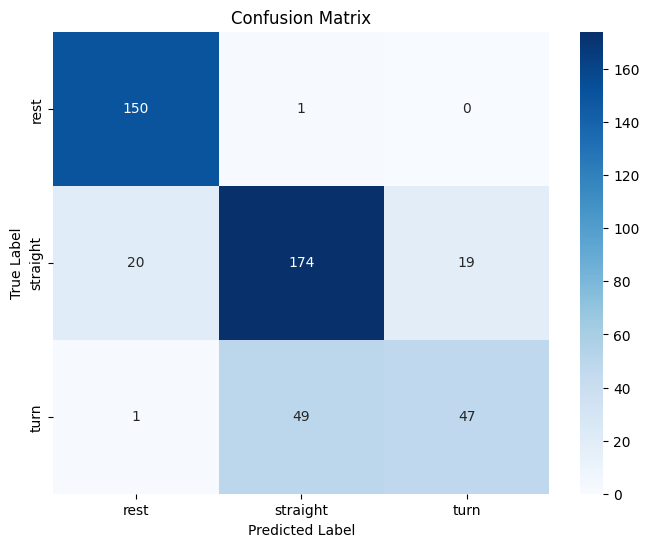

Classification Report:

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       151
    straight       0.78      0.82      0.80       213
        turn       0.71      0.48      0.58        97

    accuracy                           0.80       461
   macro avg       0.79      0.76      0.77       461
weighted avg       0.80      0.80      0.79       461



In [40]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [41]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X1 = test_set1[selected_features]
y1 = test_set1[test_set1.columns[-1]]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [42]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X2 = test_set2[selected_features]
y2 = test_set2[test_set2.columns[-1]]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [43]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(best_model.score(X1, y1)))
print("test_set2 score: {:.2f}".format(best_model.score(X2, y2)))


test_set1 score: 0.80
test_set2 score: 0.71


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

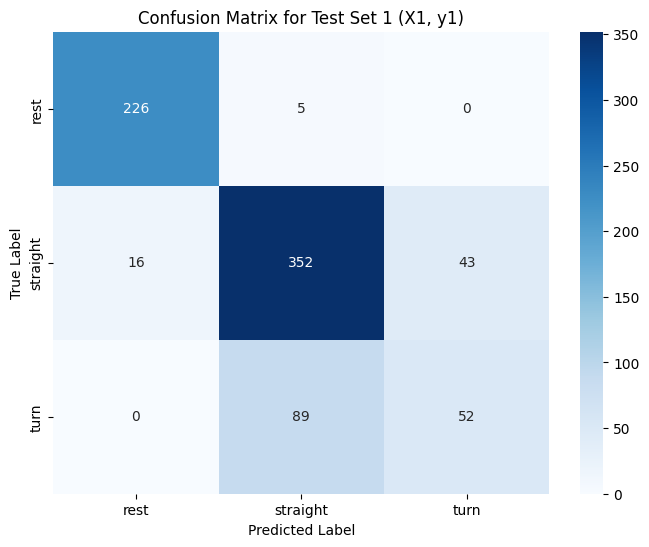

Classification Report for Test Set 1 (X1, y1):

              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       231
    straight       0.79      0.86      0.82       411
        turn       0.55      0.37      0.44       141

    accuracy                           0.80       783
   macro avg       0.76      0.73      0.74       783
weighted avg       0.79      0.80      0.79       783



In [44]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y1_pred = best_model.predict(X1)
conf_matrix_1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for Test Set 1 (X1, y1)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Classification Report for Test Set 1 (X1, y1):\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

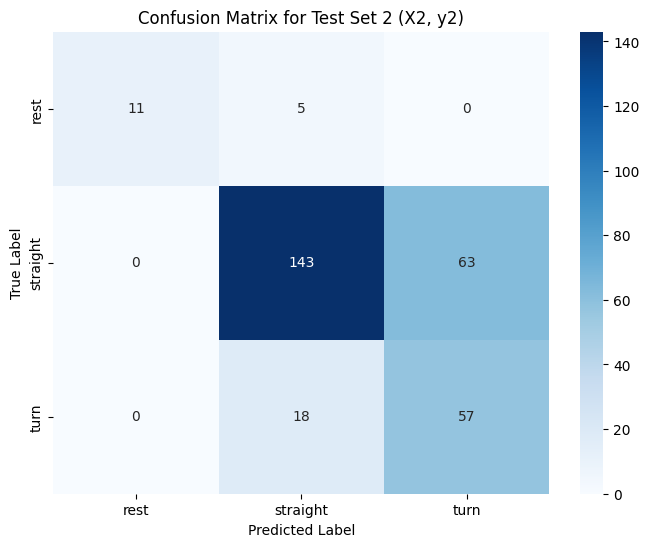

Classification Report for Test Set 2 (X2, y2):

              precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.86      0.69      0.77       206
        turn       0.47      0.76      0.58        75

    accuracy                           0.71       297
   macro avg       0.78      0.71      0.72       297
weighted avg       0.77      0.71      0.72       297



In [45]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y2_pred = best_model.predict(X2)
conf_matrix_2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for Test Set 2 (X2, y2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Classification Report for Test Set 2 (X2, y2):\n")
print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.The KNN model trained in Section 5 and the SVC model trained in Section 2 were compared based on their test set performance. SVC generally outperforms KNN in terms of accuracy and classification metrics, particularly for classes with overlapping or more complex boundaries. For example, while KNN relies on the distances to neighboring data points, which works well with simpler data distributions, SVC uses kernel functions to create more flexible boundaries, allowing it to handle more challenging class separations. This advantage is likely reflected in the confusion matrices and classification reports, where SVC shows fewer misclassifications for overlapping classes compared to KNN.

The differences in performance can also be attributed to algorithm behavior and hyperparameter optimization. KNN's performance is highly sensitive to the choice of the number of neighbors and the distance metric. If not tuned optimally, it may not achieve its best performance. In contrast, SVC benefits from kernel functions like RBF, which can model complex patterns more effectively, though its success depends on parameters like C and gamma. These discrepancies highlight that SVC is generally better suited for handling complex or overlapping data distributions, whereas KNN may perform well for simpler, well-separated data. Ultimately, SVC provides a better fit for the dataset in this case.




____